In this notebook, we will see how we can solve a (non-computational) NST part IB physics B Classical Dynamics question using computing. The question we will try is question 27c:
![ ](Screen Shot 2016-07-07 at 9.27.11 AM.png)

First, we import some modules, including springs, a notebook containing modules for drawing springs and masses.

In [1]:
from pycav.mechanics import *
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

We then make a number of particles and springs to connect them

In [2]:
particles = []
particles.append(Particle(pos = np.array([-15.,0.,0.]),
                         v = np.array([0.,0.,0.]),
                         inv_mass = 1.,
                         fixed = True))
particles.append(Particle(pos = np.array([-5.,0.,0.]),
                         v = np.array([0.,0.,0.]),
                         inv_mass = 1.,
                         fixed = False))
particles.append(Particle(pos = np.array([5.,0.,0.]),
                         v = np.array([0.,0.,0.]),
                         inv_mass = 1.,
                         fixed = False))
particles.append(Particle(pos = np.array([15.,0.,0.]),
                         v = np.array([0.,0.,0.]),
                         inv_mass = 1.,
                         fixed = True))
k = 1.
K = 1.
springs = []
springs.append(Spring(particle_1 = particles [0],
                     particle_2 = particles [1],
                     k = k))
springs.append(Spring(particle_1 = particles [1],
                     particle_2 = particles [2],
                     k = K))
springs.append(Spring(particle_1 = particles [2],
                     particle_2 = particles [3],
                     k = k))

We then create a sinusoidal force and add it to the second particle.

In [3]:
def create_sinusoidal_force(F,omega):
    def sinusoidal_force(pos,t):
        return [F*np.sin(omega*t),0,0]
    return sinusoidal_force

omega = 0.2
F = 1
particles[1].applied_force = create_sinusoidal_force(F,omega)

We then group these objects together into a system, and try running the system with different values of omega repeatedly. The amplitudes are then recorded into a x1_history and x2_history array. Once this cell is done executing, execute the last cell to see the results and see how they compare with what we expect from an analytic solution, which has resonant peaks at  
$$ \\ \omega^{2} = \frac{k}{m}$$
and
$$ \\ \omega^{2} = \frac{3k}{m}$$
With k = 1, m = 1.

In [4]:
my_system = System(collides = False, interacts = False, visualize = True, particles = particles, springs = springs, record_amplitudes = True, display_forces = True)
omega_history = []
x1_history = []
x2_history = []
while omega < 5 :
    particles[1].applied_force = create_sinusoidal_force(F,omega)
    my_system.time = 0
    my_system.run_for(30.)
    omega_history.append(omega)
    x1_history.append(particles[1].amplitude)
    x2_history.append(particles[2].amplitude)
    particles[1].pos = np.array([-5.,0.,0.])
    particles[2].pos = np.array([5.,0.,0.])
    particles[1].v = np.array([0.,0.,0.])
    particles[2].v = np.array([0.,0.,0.])
    for particle in particles:
        particle.max_point = np.array([None])
        particle.min_point = np.array([None])
    omega += 0.2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


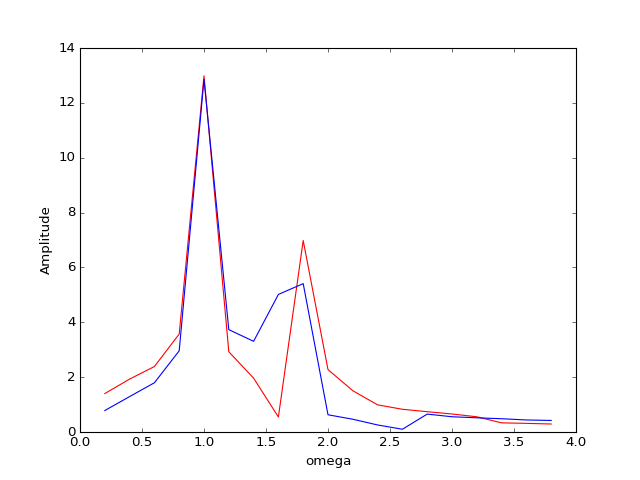

[0.78266534936274734, 1.2911533691374295, 1.7952947314863268, 2.9594185606939165, 12.857668249437202, 3.7318997146029131, 3.305974269765338, 5.0163702523782483, 5.4088252858002894, 0.62785372888227808, 0.46542782191307008, 0.25679697371757371, 0.10011962706545141, 0.65285965141159696, 0.55578843060894645, 0.51778863134380515, 0.4833213125507676, 0.43895639190832991, 0.4209991952567842]


In [5]:
plt.plot(omega_history,x1_history,'r',label = 'x1')
print(x2_history)
plt.plot(omega_history,x2_history,'b',label = 'x2')
plt.xlabel('omega')
plt.ylabel('Amplitude')